Regression Metrics:
Mean Squared Error: 0.045
R2 Score: 0.848

Classification Metrics:
Accuracy: 0.948

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       802
           1       0.99      0.99      0.99      1402
           2       0.86      0.61      0.71       196

    accuracy                           0.95      2400
   macro avg       0.91      0.85      0.88      2400
weighted avg       0.95      0.95      0.95      2400



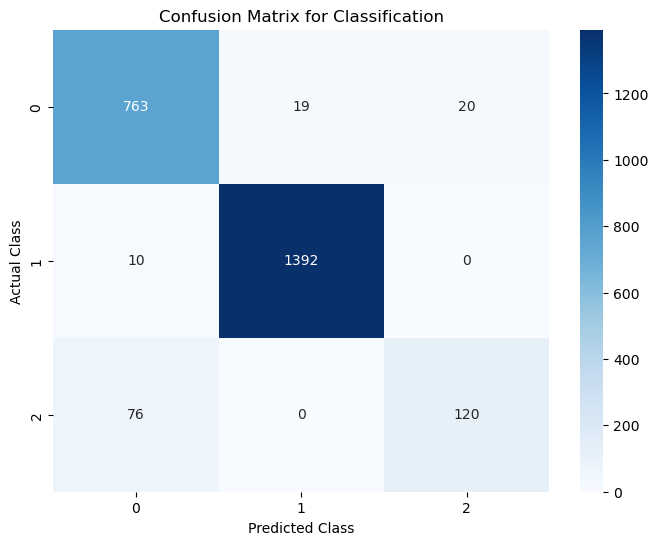

Enter the following feature values for prediction:


Enter ambient_light_lux:  35
Enter motion_detected:  1
Enter temperature_celsius:  15
Enter occupancy_count:  5
Enter energy_price_per_kwh:  3
Enter prev_hour_energy_usage_kwh:  5
Enter traffic_density:  15
Enter avg_pedestrian_speed:  3
Enter adjusted_light_intensity:  50


Valid options for day_of_week: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


Enter day_of_week:  Wednesday


Valid options for time_of_day: ['Morning', 'Afternoon', 'Evening', 'Night']


Enter time_of_day:  Afternoon


Valid options for weather_condition: ['Clear', 'Cloudy', 'Rainy', 'Foggy']


Enter weather_condition:  Cloudy


Valid options for special_event_flag: ['0', '1']


Enter special_event_flag:  1



Predictions:
Predicted Energy Consumption (kWh): 1.185
Predicted Lighting Action Class: 0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Load the dataset
df = pd.read_csv("smart_lighting_dataset_2024.csv")

# Define feature columns
numerical_features = ['ambient_light_lux', 'motion_detected', 'temperature_celsius', 'occupancy_count', 
                      'energy_price_per_kwh', 'prev_hour_energy_usage_kwh', 'traffic_density', 
                      'avg_pedestrian_speed', 'adjusted_light_intensity']
categorical_features = ['day_of_week', 'time_of_day', 'weather_condition', 'special_event_flag']

# Preprocess categorical features
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Define features and targets
X = df[numerical_features + categorical_features]
y_reg = df['energy_consumption_kwh']
y_clf = df['lighting_action_class']

# Split data for training and testing
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train regression model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train_reg)

# Train classification model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_clf, y_train_clf)

# Evaluate models
# Regression evaluation
y_pred_reg = regressor.predict(X_test)
print("Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.3f}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.3f}")

# Classification evaluation
y_pred_clf = classifier.predict(X_test_clf)
print("\nClassification Metrics:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))

# Function to get user input for predictions
def get_user_input():
    print("Enter the following feature values for prediction:")
    user_data = {}
    
    # Numerical features input
    for feature in numerical_features:
        while True:
            try:
                value = float(input(f"Enter {feature}: "))
                user_data[feature] = value
                break
            except ValueError:
                print(f"Please enter a valid number for {feature}")
    
    # Categorical features input
    for feature in categorical_features:
        if feature == 'day_of_week':
            valid_options = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            print(f"Valid options for {feature}: {valid_options}")
        elif feature == 'time_of_day':
            valid_options = ['Morning', 'Afternoon', 'Evening', 'Night']
            print(f"Valid options for {feature}: {valid_options}")
        elif feature == 'weather_condition':
            valid_options = ['Clear', 'Cloudy', 'Rainy', 'Foggy']
            print(f"Valid options for {feature}: {valid_options}")
        elif feature == 'special_event_flag':
            valid_options = ['0', '1']
            print(f"Valid options for {feature}: {valid_options}")
        
        while True:
            value = input(f"Enter {feature}: ")
            if feature == 'special_event_flag' or value in valid_options:
                user_data[feature] = value
                break
            else:
                print(f"Invalid input. Please choose from {valid_options}")
    
    return user_data

# Get user input
user_input = get_user_input()

# Create a DataFrame from user input
input_df = pd.DataFrame([user_input])

# Preprocess the input
# Encode categorical features
for feature in categorical_features:
    input_df[feature] = label_encoders[feature].transform(input_df[feature])

# Combine numerical and categorical features
X_input = input_df[numerical_features + categorical_features]

# Scale numerical features
X_input[numerical_features] = scaler.transform(X_input[numerical_features])

# Make predictions
regression_prediction = regressor.predict(X_input)
classification_prediction = classifier.predict(X_input)

# Output predictions
print("\nPredictions:")
print(f"Predicted Energy Consumption (kWh): {regression_prediction[0]:.3f}")
print(f"Predicted Lighting Action Class: {classification_prediction[0]}")